<a href="https://colab.research.google.com/github/shruvid2/Sentiment-Analysis/blob/main/Sentiment-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import re
import nltk
import numpy as np
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
dataset = pd.read_csv('/content/drive/My Drive/amazon_alexa.tsv',delimiter='\t',quoting=3)

In [30]:
print(dataset)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     "Sometimes while playing a game, you can answe...         1  
3     "I have had a lot of fun with this thing. My 4...         1  
4                                                 Music         1  
...                                                

In [31]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [32]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [33]:
dataset.groupby('rating').count()

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,95,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

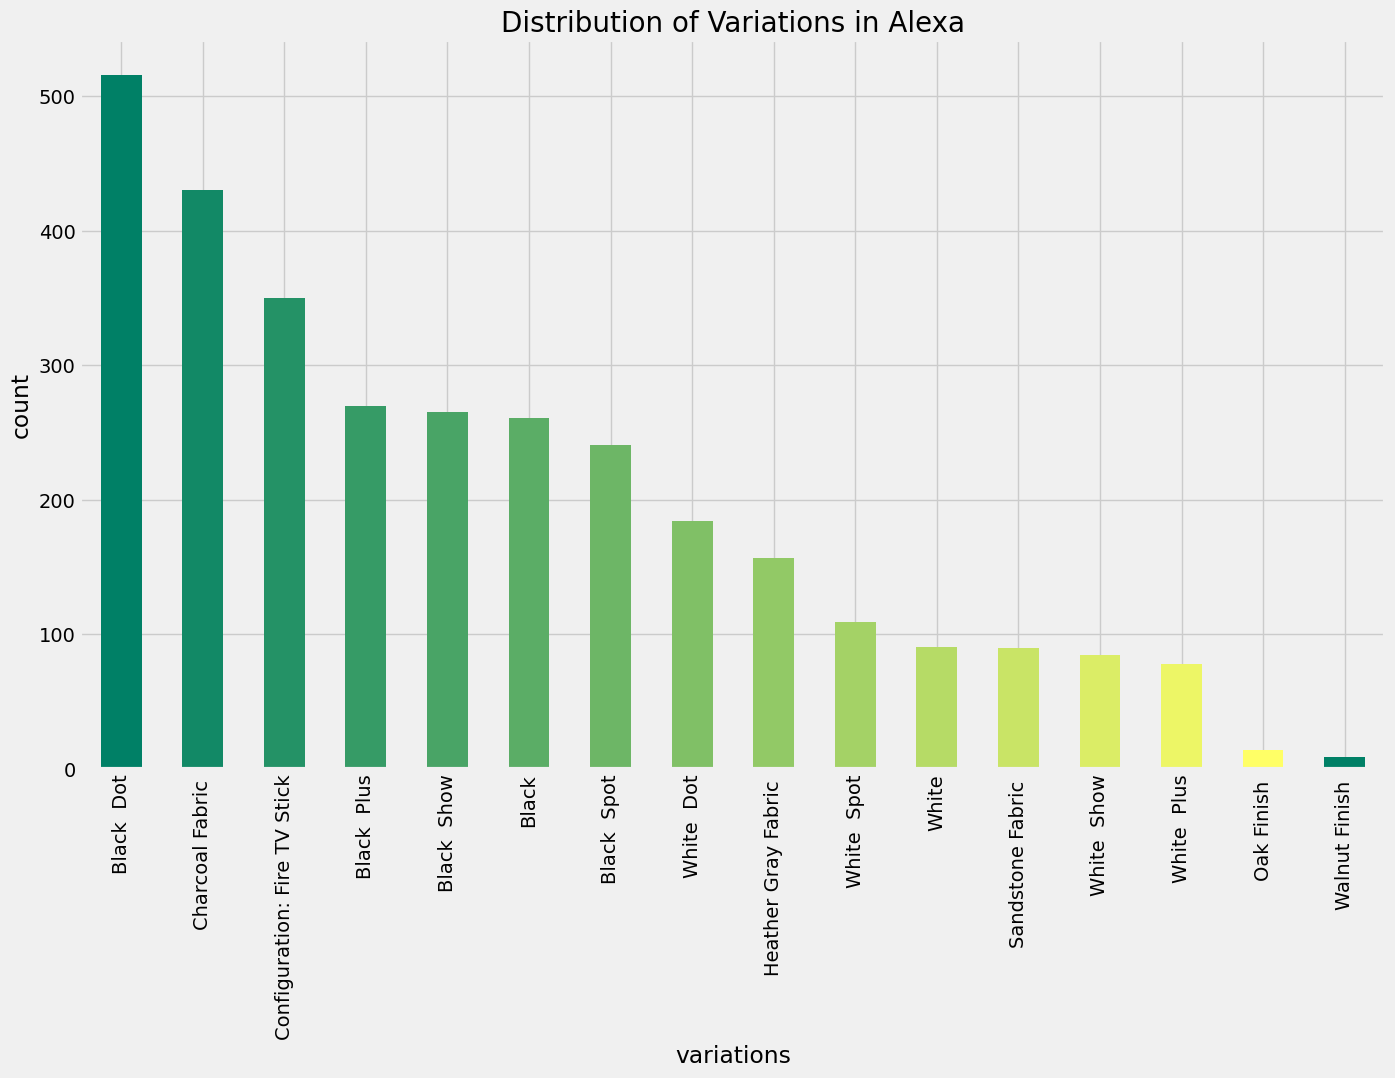

In [35]:
#BAR PLOT
color = plt.cm.summer(np.linspace(0, 1, 15))
dataset['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [36]:
review = dataset.iloc[:,3].values
print(review)

['Love my Echo!' 'Loved it!'
 '"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."'
 ...
 '"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."'
 '"Only complaint I have is that the sound quality isn\'t great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don\'t mind the audio quality, but if you\'re bothered by that kind of thing I\'d go with the fu

In [37]:
print(dataset['verified_reviews'].isnull().sum())

1


In [38]:
dataset = dataset.dropna(subset=['verified_reviews'])

In [39]:
dataset['verified_reviews'] = dataset['verified_reviews'].fillna('')

In [40]:
dataset['verified_reviews'] = dataset['verified_reviews'].astype(str)

In [41]:
dataset['length'] = dataset['verified_reviews'].apply(len)
dataset.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

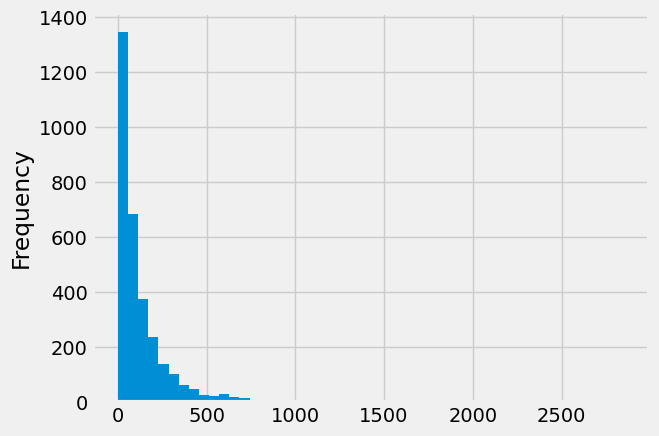

In [42]:
%matplotlib inline
dataset['length'].plot(bins=50, kind='hist')


Majority of the reviews are of length ranging from 0 to 200 characters

<Axes: ylabel='Frequency'>

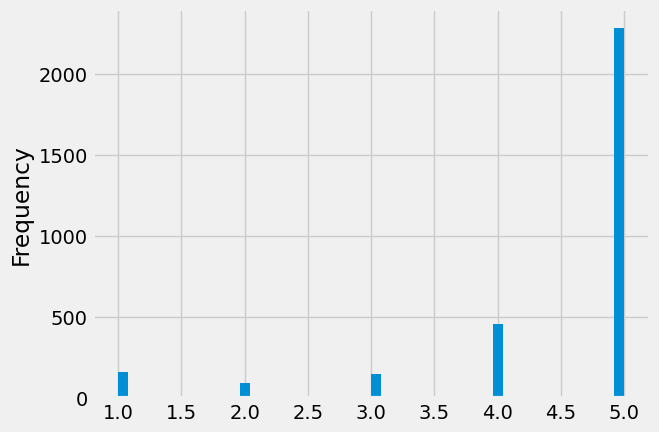

In [43]:
dataset['rating'].plot(bins=50, kind='hist')

Most of them have given a rating of 5

<Axes: ylabel='Frequency'>

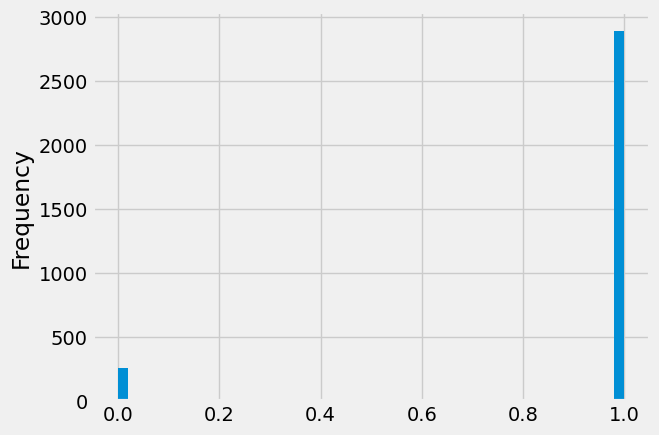

In [44]:
dataset['feedback'].plot(bins=50, kind='hist')

Around 250 people have not given feedback

In [49]:
print(len(dataset['verified_reviews']))

3149


## cleaning the texts and data preparation

In [51]:
corpus = []
dataset = dataset.reset_index(drop=True)
for i in range(len(dataset)):
  reviews = re.sub('[^ a-zA-Z]',' ',dataset['verified_reviews'][i])
  reviews=reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  corpus = []
  reviews = [ps.stem(word) for word in reviews if word not in set(stopwords.words('english'))]
  reviews = ' '.join(reviews)
  corpus.append(reviews)
  print(corpus)

['love echo']
['love']
['sometim play game answer question correctli alexa say got wrong answer like abl turn light away home']
['lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well']
['music']
['receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els']
['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet']
['think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous']
['look great']
['love listen song heard sinc childhood get news weather inform great']
['sent year old dad talk constantli']
['love learn knew thing eveyday still figur everyth work far easi use understand make laugh time']
['purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [53]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
corpus=[]
for i in range(len(dataset)):

    #replace non-letter with space
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'][i] )

    #convert all to lower case
    review=review.lower()

    #split
    review=review.split()

    #stemming and Lemmanization
    ps=PorterStemmer()
    lm = WordNetLemmatizer()

    #review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [61]:
#creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
Y=dataset.iloc[:,4].values

In [62]:
CV= CountVectorizer(stop_words = 'english')
words = CV.fit_transform(dataset.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
'''
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()'''
print(frequency)


             word  freq
0         respond   839
1             yet   729
2             car   632
3          resist   342
4        realized   286
...           ...   ...
1495  inexpensive     1
1496        trial     1
1497           al     1
1498       motown     1
1499        salsa     1

[1500 rows x 2 columns]


In [63]:
print(cv.get_feature_names_out())

['ability' 'able' 'absolutely' ... 'yr' 'zero' 'zigbee']


### Naive Bayes

---



In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state = 0)

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [66]:
y_pred=classifier.predict(X_test)

In [67]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 22  23]
 [240 345]]


In [68]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y_test, y_pred, average='binary')
print(precision)

0.9375


In [69]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print(score)

0.7240293809024134


### Random Forest Classifier

In [71]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X1_train, y1_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [73]:
y1_pred=classifier.predict(X_test)

In [74]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 12  33]
 [  4 581]]


In [75]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y1_test, y1_pred, average='binary')
print(precision)

0.9462540716612378


In [76]:
from sklearn.metrics import f1_score
score = f1_score(y1_test, y1_pred, average='binary')
print(score)

0.969140950792327
